In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import skdsp.signal.printer as pt
import numpy as np
import sympy as sp
import scipy.signal as cp
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Básicas

In [2]:
def s1(sg='delta', fd='just delay', width=16, delay=0):
    npts = 15
    if sg == 'delta':
        s = ds.Delta()
    elif sg == 'step':
        s = ds.Step()
    elif sg == 'ramp':
        s = ds.Ramp()
    elif sg == 'unit ramp':
        s = ds.Ramp() * ds.Step()
    elif sg == 'rect':
        s = ds.Rect(width)
    elif sg == 'triang':
        s = ds.Triang(width)
    elif sg == 'sin':
        s = ds.Sine(width)
    elif sg == 'cos':
        s = ds.Cosine(width)
    if fd == 'flip then delay':
        s = s.flip().delay(delay)
    elif fd == 'delay then flip':
        s = s.delay(delay).flip()
    elif fd == 'just delay':
        s = s.delay(delay)
    ns = np.arange(-npts, npts+1)
    ys = s[ns]
    plt.figure(figsize=(20, 4))
    ml = plt.stem(ns, ys, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.xlim([-npts-0.5, npts+0.5])
    min_ = min(0, np.min(ys))
    max_ = max(np.max(ys), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(pt.latex(s, mode='inline'), size=24)
    plt.grid(True)

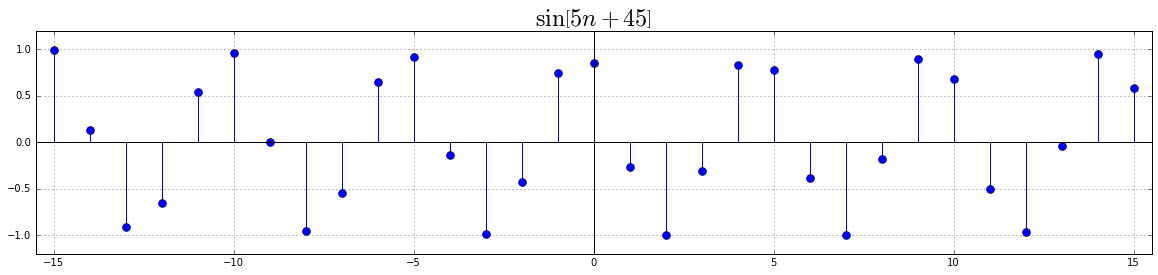

In [3]:
interact(s1, sg=('delta', 'step', 'ramp', 'unit ramp', 'rect', 'triang', 'sin', 'cos'),
         fd=('just delay', 'flip then delay', 'delay then flip'),
         width=(1, 30, 2), delay=(-15, 15));